In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("magma_r", n_colors=9)

In [2]:
train = pd.read_csv('data/train.csv')
print("Dataset is ready for use!")

Dataset is ready for use!


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.set_index('PassengerId', inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

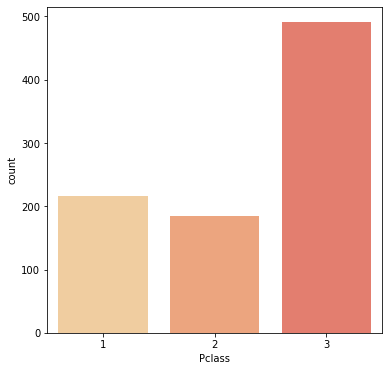

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Pclass', data=train)
plt.show()
# Majority of Passengers were of Class-3

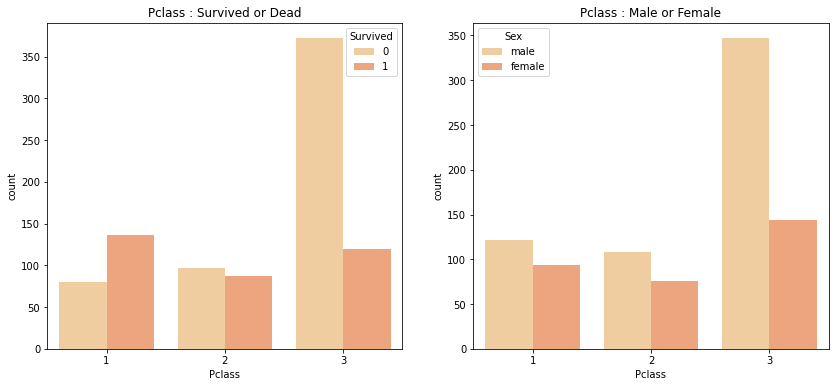

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, ax=ax[0])
ax[0].set_title("Pclass : Survived or Dead")
sns.countplot(x='Pclass', hue='Sex', data=train, ax=ax[1])
ax[1].set_title("Pclass : Male or Female")
plt.show()
# Except class-1, in every class more people have died than survived
# Every class has a majority of Male passengers when compared to Female

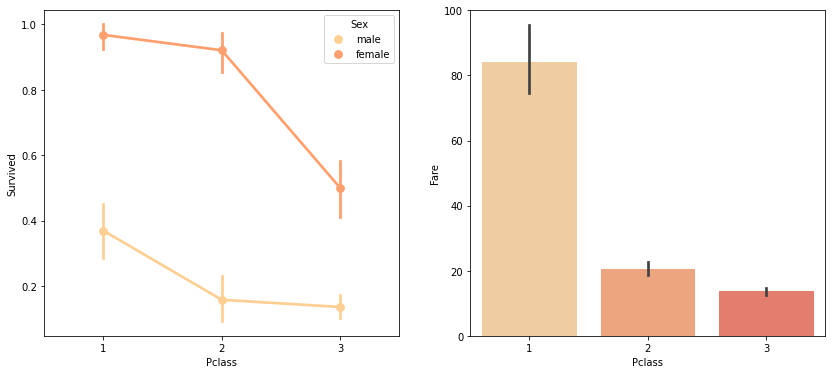

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='point', ax=ax[0])
sns.barplot(x='Pclass', y='Fare', data=train, ax=ax[1])
plt.show()
# Survival Rate of Females is more than Males in every class
# Significant drop in survival rate of Females from class-2 to class-3

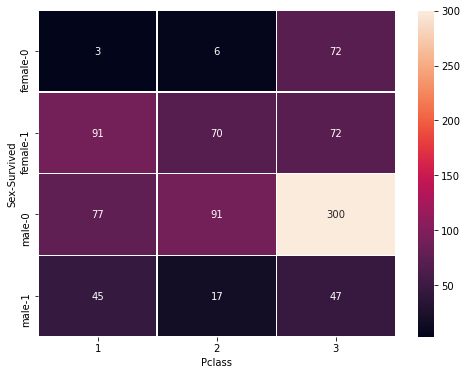

In [14]:
plt.figure(figsize=(8, 6))
df = pd.DataFrame(pd.crosstab([train['Sex'], train['Survived']], train['Pclass'], margins=True))
df.drop('All', axis=1, inplace=True)
df.drop('All', axis=0, inplace=True, level=0)
sns.heatmap(df, annot=True, fmt='d', linewidth=.5)
plt.show()
# In class-1, almost double the amount of Females survived than Males
# and very few Females of class-1 died when compared to other classes
# In class-2, Female survival rate to Male is a lot more than in class-1
# Whereas, the Male death rate to Female has also increased by a small amount
# In class-3, the overall survival rate is very low
# A very large number of Men and Women died but the survival ratio of Men

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train['Age'].isna().sum()

177

In [17]:
print("Mean Age : ", train['Age'].mean())
print("Median Age : ", train['Age'].median())

Mean Age :  29.69911764705882
Median Age :  28.0


In [18]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Age'].isna().sum()

0

In [19]:
train['Age_Group'] = train['Age'].apply(lambda x : int(x/10))
train['Age_Group'].value_counts()

2    397
3    167
1    102
4     89
0     62
5     48
6     19
7      6
8      1
Name: Age_Group, dtype: int64

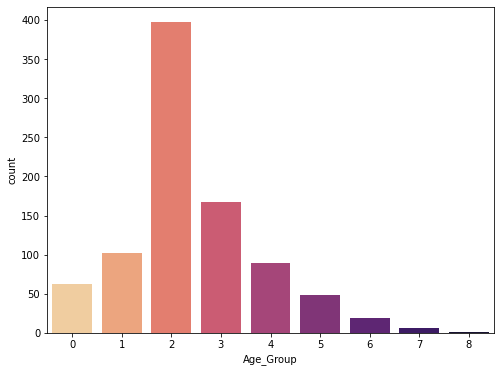

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age_Group', data=train)
plt.show()
# Most Passengers were of age 20-40
# There were more younger passengers than older ones

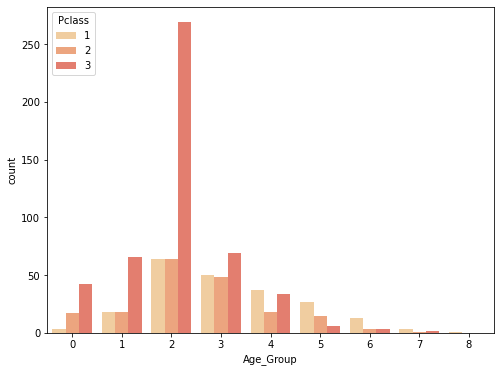

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Pclass', data=train)
plt.show()

In [22]:
# sns.countplot(x='Age', hue='Fare', data=train)

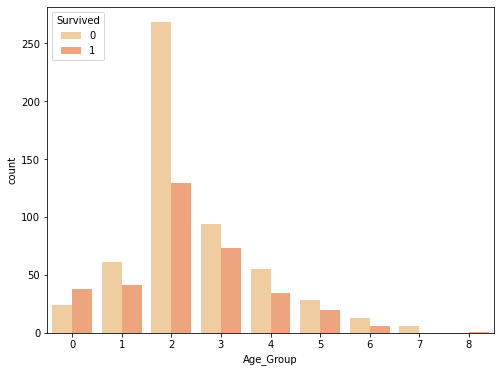

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='Survived', data=train)
plt.show()
# Except age 0-10, in every age group there has been more death than survival
# Except age 20-30, in every age group there is a similar Death/Survival rate

<Figure size 1008x432 with 0 Axes>

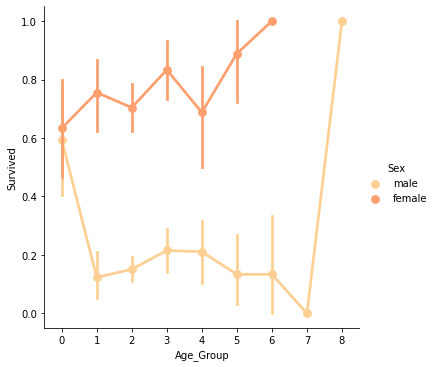

In [24]:
plt.figure(figsize=(14,6))
sns.catplot(x='Age_Group', y='Survived', hue='Sex', data=train, kind='point')
plt.show()
# Lowest Female survival rate between 0-10 age
# Highest Female survival rate between 60-70 age
# Highest Male survival rate between 0-10 and 80-90
# Lowest Male survival rate between 70-80

In [25]:
train.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Age_Group      0
dtype: int64

In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train['Embarked'].fillna(value='S', inplace=True)
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

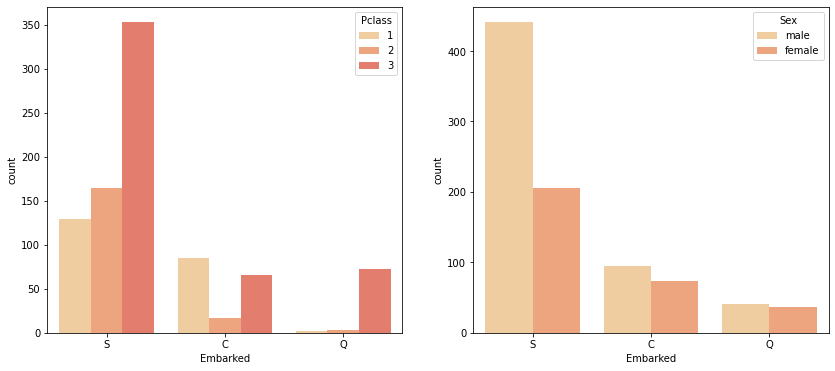

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Embarked', hue='Pclass', data=train, ax=ax[0])
sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[1])
plt.show()

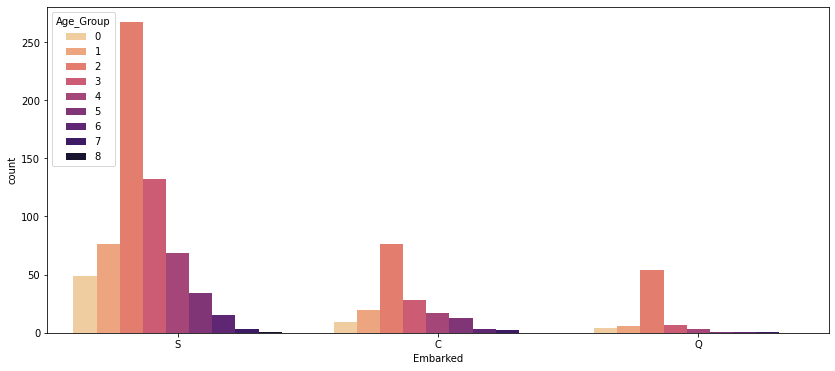

In [29]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Embarked', hue='Age_Group', data=train)
plt.show()

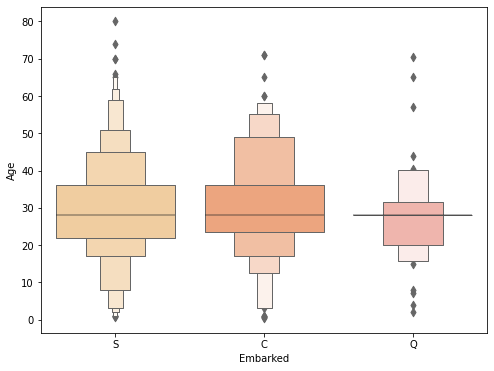

In [30]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Embarked', y='Age', data=train)
plt.show()

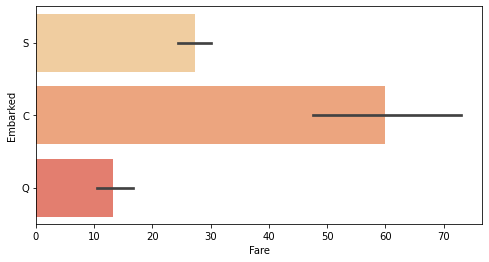

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(y='Embarked', x='Fare', data=train)
plt.show()

In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [33]:
train.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       0
Age_Group      0
dtype: int64

In [34]:
train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

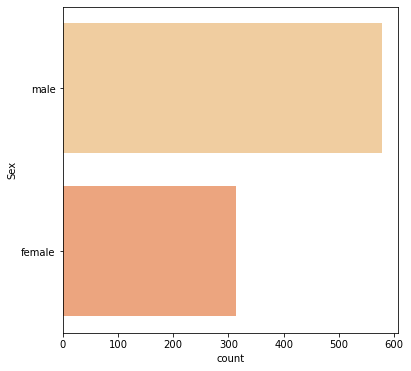

In [35]:
plt.figure(figsize=(6, 6))
sns.countplot(y='Sex', data=train)
plt.show()

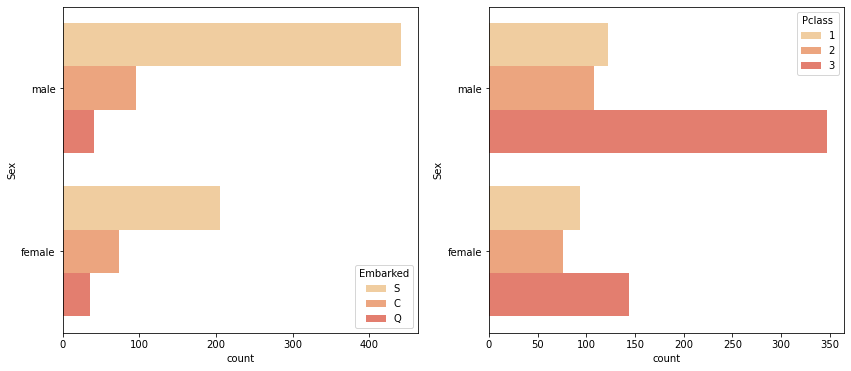

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(y='Sex', hue='Embarked', data=train, ax=ax[0])
sns.countplot(y='Sex', hue='Pclass', data=train, ax=ax[1])
plt.show()

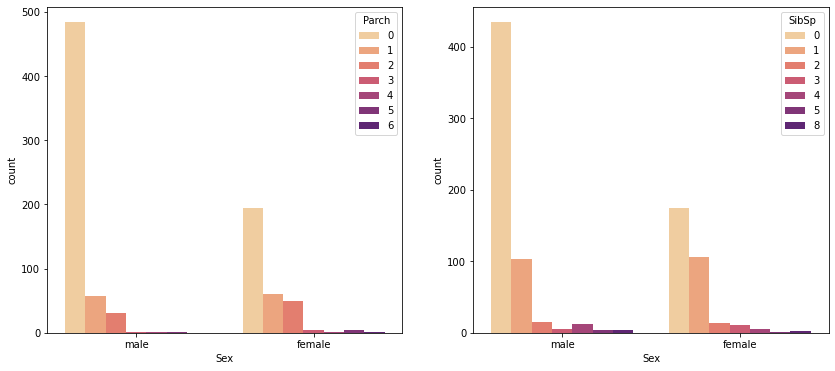

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Sex', hue='Parch', data=train, ax=ax[0])
sns.countplot(x='Sex', hue='SibSp', data=train, ax=ax[1])
plt.show()

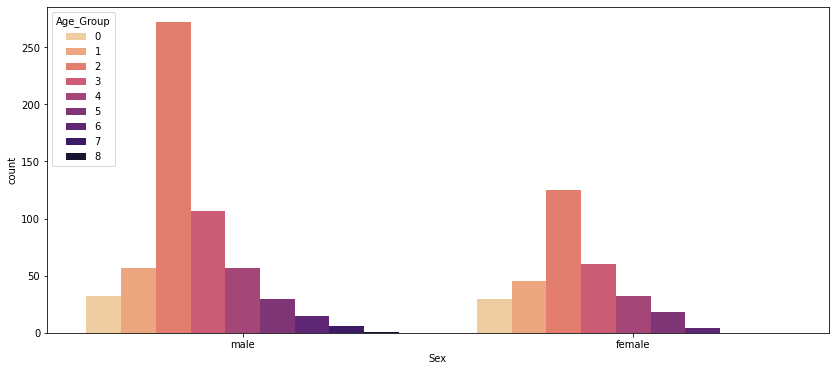

In [38]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Sex', hue='Age_Group', data=train)
plt.show()

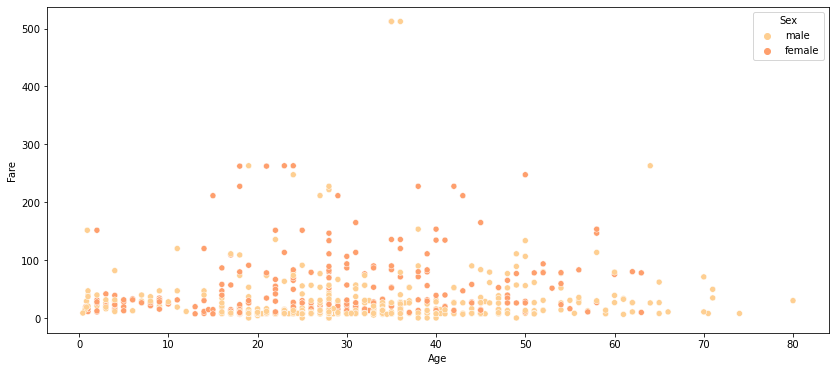

In [39]:
plt.figure(figsize=(14, 6))
sns.scatterplot(y='Fare', x='Age', hue='Sex', data=train)
plt.show()

In [40]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [41]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

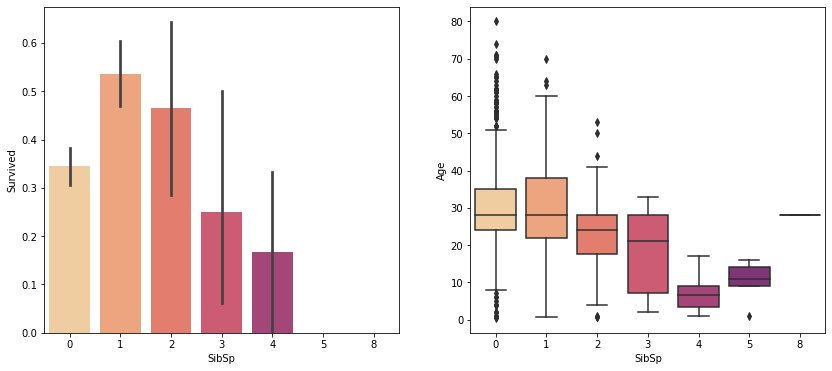

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='SibSp', y='Survived', data=train, ax=ax[0])
sns.boxplot(x='SibSp', y='Age', data=train, ax=ax[1])

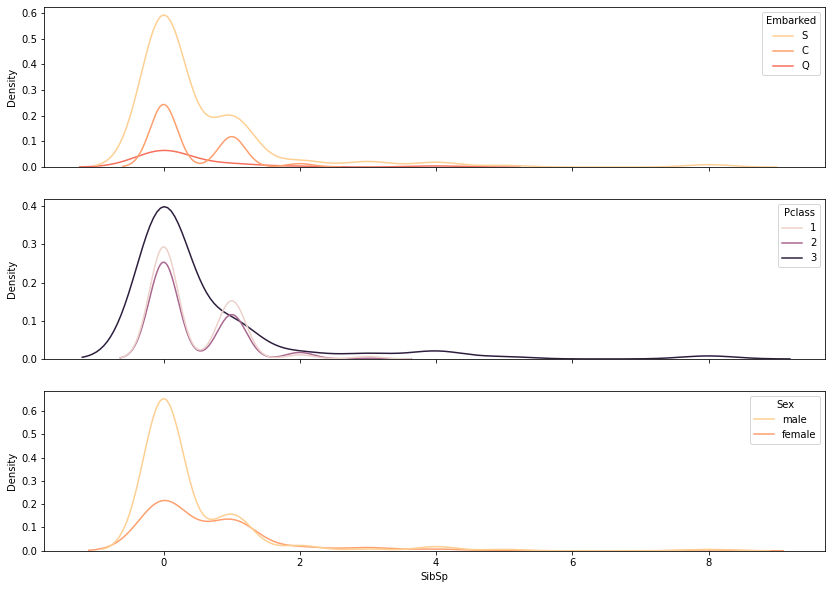

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
sns.kdeplot(x='SibSp', hue='Embarked', data=train, ax=ax[0])
sns.kdeplot(x='SibSp', hue='Pclass', data=train, ax=ax[1])
sns.kdeplot(x='SibSp', hue='Sex', data=train, ax=ax[2])
plt.show()

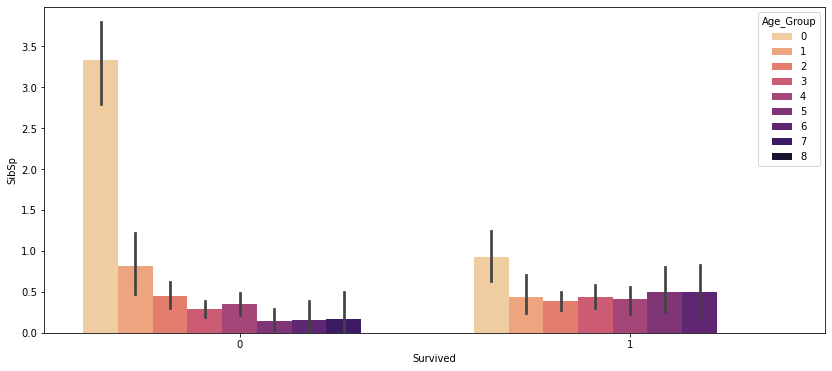

In [44]:
plt.figure(figsize=(14, 6))
sns.barplot(y='SibSp', x='Survived', hue='Age_Group', data=train)
plt.show()

In [45]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [46]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

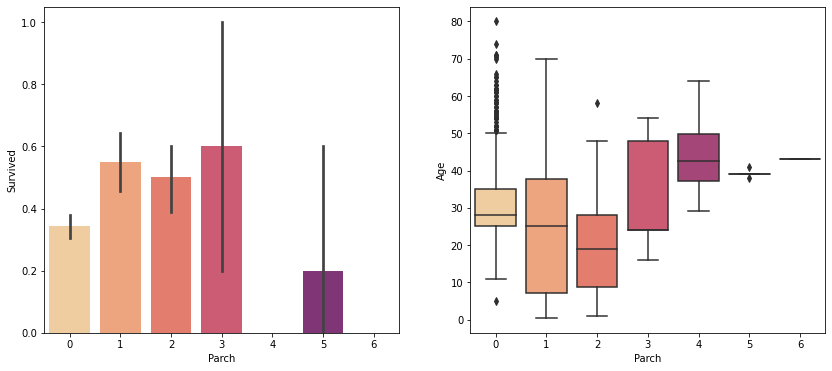

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Parch', y='Survived', data=train, ax=ax[0])
sns.boxplot(x='Parch', y='Age', data=train, ax=ax[1])
plt.show()

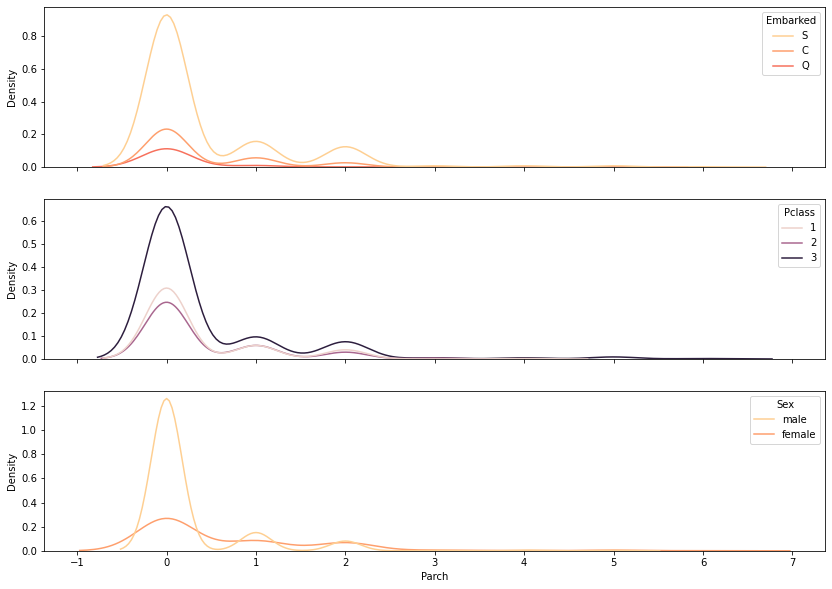

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
sns.kdeplot(x='Parch', hue='Embarked', data=train, ax=ax[0])
sns.kdeplot(x='Parch', hue='Pclass', data=train, ax=ax[1])
sns.kdeplot(x='Parch', hue='Sex', data=train, ax=ax[2])
plt.show()

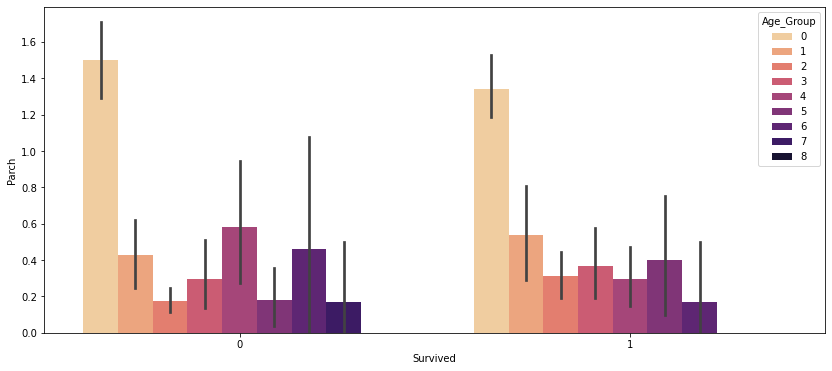

In [49]:
plt.figure(figsize=(14, 6))
sns.barplot(y='Parch', x='Survived', hue='Age_Group', data=train)
plt.show()

In [50]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [51]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
C86            1
D45            1
B101           1
D9             1
D30            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
train['Cabin'].fillna(value='U', inplace=True)
train['Cabin'].describe()

count     891
unique    148
top         U
freq      687
Name: Cabin, dtype: object

In [53]:
cabin_list = train['Cabin'].tolist()
for i in range(len(cabin_list)):
    if cabin_list[i] != 'U':
        cabin_list[i] = cabin_list[i][0]
train['Cabin_Deck'] = cabin_list
train['Cabin_Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [54]:
train['Cabin_Deck'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Deck, dtype: int64

<AxesSubplot:xlabel='Cabin_Deck', ylabel='count'>

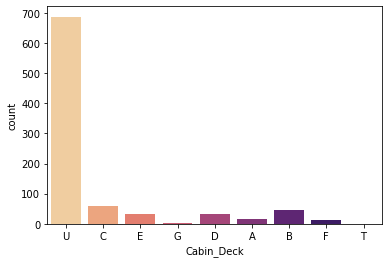

In [55]:
sns.countplot(x='Cabin_Deck', data=train)

In [56]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [57]:
train['Ticket'].value_counts()

CA. 2343      7
347082        7
1601          7
3101295       6
347088        6
             ..
349207        1
C.A. 29178    1
28228         1
2631          1
330979        1
Name: Ticket, Length: 681, dtype: int64

In [58]:
ticket_list = train['Ticket'].tolist()
for i in range(len(ticket_list)):
    ticket_list[i] = ticket_list[i].split(' ')[0]

train['Ticket_Type'] = ticket_list
train['Ticket_Type'].unique()

array(['A/5', 'PC', 'STON/O2.', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', 'PP', '113783', 'A/5.', '347082',
       '350406', '248706', '382652', '244373', '345763', '2649', '239865',
       '248698', '330923', '113788', '347077', '2631', '19950', '330959',
       '349216', '335677', 'C.A.', '113789', '2677', 'A./5.', '345764',
       '2651', '7546', '11668', '349253', 'SC/Paris', '330958',
       'S.C./A.4.', '370371', '14311', '2662', '349237', '3101295',
       'A/4.', '2926', '113509', '19947', '2697', 'CA', '2669', '113572',
       '36973', '347088', '2661', 'S.P.', '3101281', '315151', 'S.O.C.',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C', '3101278', 'W./C.',
       'SOTON/OQ', '343275', '343276', '347466', 'W.E.P.', '364500',
       '374910', '231919', '244367', '349245', '349215', '35281', '7540',
       '3101276', '349207', '343120', '312991', '349249', '371110',

In [59]:
isNumeric = train['Ticket_Type'].tolist()
for i in range(len(isNumeric)):
#     print(isNumeric[i][:9], end= ' ')
#     print(isNumeric[i][:9].isdecimal())
    isNumeric[i] = int(isNumeric[i][:9].isdecimal())

train['isNumeric'] = isNumeric
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Deck,Ticket_Type,isNumeric
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,U,A/5,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,C,PC,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,2,U,STON/O2.,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,C,113803,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,3,U,373450,1


<AxesSubplot:xlabel='isNumeric', ylabel='count'>

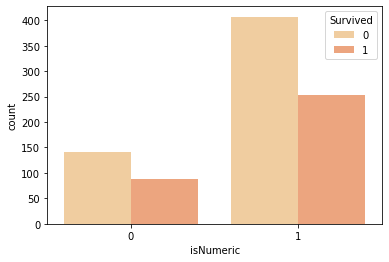

In [60]:
sns.countplot(x='isNumeric', hue='Survived', data=train)

In [61]:
for i in range(len(ticket_list)):
    ticket_list[i] = ticket_list[i][:3]

train['Ticket_Type'] = ticket_list
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Cabin_Deck,Ticket_Type,isNumeric
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,U,A/5,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,C,PC,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,2,U,STO,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,C,113,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,3,U,373,1


In [63]:
train['Ticket_Type'].value_counts()

PC     60
349    53
347    48
113    47
C.A    28
       ..
457     1
SCO     1
394     1
130     1
923     1
Name: Ticket_Type, Length: 152, dtype: int64

<AxesSubplot:xlabel='Cabin_Deck', ylabel='count'>

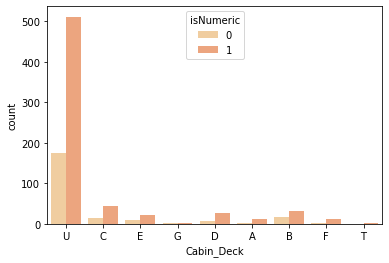

In [64]:
sns.countplot(x='Cabin_Deck', hue='isNumeric', data=train)